# Part 1 - WeatherPy

In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#### Generate the Cities List by Using the citipy Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | happy valley-goose bay
Processing Record 4 of Set 1 | ordos
City not found. Skipping...
Processing Record 5 of Set 1 | mazara del vallo
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | maqat
Processing Record 9 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 10 of Set 1 | muan
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | quelimane
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | toga village
City not found. Skipping...
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | ambovombe
Processing Record 20 of Set 1 | corner brook
Pr

Processing Record 35 of Set 4 | kingston
Processing Record 36 of Set 4 | antigonish
Processing Record 37 of Set 4 | manadhoo
Processing Record 38 of Set 4 | belmonte
Processing Record 39 of Set 4 | annaba
Processing Record 40 of Set 4 | ndola
Processing Record 41 of Set 4 | fort st. john
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | swan hill
Processing Record 44 of Set 4 | vilyuchinsk
Processing Record 45 of Set 4 | wailua homesteads
Processing Record 46 of Set 4 | ijuw
City not found. Skipping...
Processing Record 47 of Set 4 | okhotsk
Processing Record 48 of Set 4 | puerto armuelles
Processing Record 49 of Set 4 | campbell river
Processing Record 0 of Set 5 | pathein
Processing Record 1 of Set 5 | vera cruz
Processing Record 2 of Set 5 | usogorsk
Processing Record 3 of Set 5 | nadi
Processing Record 4 of Set 5 | puerto san jose
Processing Record 5 of Set 5 | mount hagen
Processing Record 6 of Set 5 | petropavlovsk-kamchatsky
Processing Record 7 of Set 5 | eg

Processing Record 25 of Set 8 | ojinaga
Processing Record 26 of Set 8 | carbonear
Processing Record 27 of Set 8 | oltinko'l
Processing Record 28 of Set 8 | senador pompeu
Processing Record 29 of Set 8 | sittwe
Processing Record 30 of Set 8 | camarinas
Processing Record 31 of Set 8 | el alto
Processing Record 32 of Set 8 | idfu
Processing Record 33 of Set 8 | maun
Processing Record 34 of Set 8 | arvayheer
Processing Record 35 of Set 8 | mbuji-mayi
Processing Record 36 of Set 8 | tympaki
Processing Record 37 of Set 8 | alliance
Processing Record 38 of Set 8 | general villegas
Processing Record 39 of Set 8 | eseka
Processing Record 40 of Set 8 | palmer
Processing Record 41 of Set 8 | glendive
Processing Record 42 of Set 8 | necochea
Processing Record 43 of Set 8 | galliano
Processing Record 44 of Set 8 | barabai
Processing Record 45 of Set 8 | crane
Processing Record 46 of Set 8 | santander
Processing Record 47 of Set 8 | sisimiut
Processing Record 48 of Set 8 | tadine
Processing Record 4

Processing Record 12 of Set 12 | chui
Processing Record 13 of Set 12 | la jolla
Processing Record 14 of Set 12 | miracema do tocantins
Processing Record 15 of Set 12 | dumas
Processing Record 16 of Set 12 | madara
Processing Record 17 of Set 12 | thief river falls
Processing Record 18 of Set 12 | norfolk
Processing Record 19 of Set 12 | posse
Processing Record 20 of Set 12 | laojunmiao
Processing Record 21 of Set 12 | den chai
Processing Record 22 of Set 12 | kone
Processing Record 23 of Set 12 | eyl
Processing Record 24 of Set 12 | revelstoke
Processing Record 25 of Set 12 | suamico
Processing Record 26 of Set 12 | viedma
Processing Record 27 of Set 12 | vryburg
Processing Record 28 of Set 12 | coracao de jesus
Processing Record 29 of Set 12 | dharmapuri
Processing Record 30 of Set 12 | cambria
Processing Record 31 of Set 12 | urengoy
Processing Record 32 of Set 12 | sarankhola
Processing Record 33 of Set 12 | pingliang
Processing Record 34 of Set 12 | kidal
Processing Record 35 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [17]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-1.91,93,100,5.66,CA,1699692075
1,albany,42.6001,-73.9662,5.23,79,33,2.66,US,1699691857
2,happy valley-goose bay,53.3168,-60.3315,-2.83,74,75,3.60,CA,1699692219
3,mazara del vallo,37.6641,12.5880,20.97,59,50,5.94,IT,1699692220
4,port-aux-francais,-49.3500,70.2167,2.70,66,69,10.01,TF,1699691952
5,ribeira grande,38.5167,-28.7000,20.22,88,20,7.20,PT,1699692156
6,maqat,47.6500,53.3167,9.19,51,7,8.23,KZ,1699692222
7,muan,34.9897,126.4714,7.94,61,75,6.69,KR,1699692224
8,margaret river,-33.9500,115.0667,18.41,55,1,8.89,AU,1699692022
9,hasaki,35.7333,140.8333,13.22,60,100,8.40,JP,1699692225


In [18]:
# Export the City_Data into a csv
csv_file_path = "C:\\Users\\sooki\\OneDrive\\Desktop\\api_challenge\\output_data\\cities.csv"
city_data_df.to_csv(csv_file_path, index_label="City_ID")

In [20]:
# Read saved data
csv_file_path = "C:\\Users\\sooki\\OneDrive\\Desktop\\api_challenge\\output_data\\cities.csv"
city_data_df = pd.read_csv(csv_file_path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-1.91,93,100,5.66,CA,1699692075
1,albany,42.6001,-73.9662,5.23,79,33,2.66,US,1699691857
2,happy valley-goose bay,53.3168,-60.3315,-2.83,74,75,3.60,CA,1699692219
3,mazara del vallo,37.6641,12.5880,20.97,59,50,5.94,IT,1699692220
4,port-aux-francais,-49.3500,70.2167,2.70,66,69,10.01,TF,1699691952


### Requirement 1. Create Plots to Showcase the Relationship Between Weather Variables and Latitude
- Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code. 
- Create a series of scatter plots to showcase the following relationships: 

#### Latitude vs. Temperature

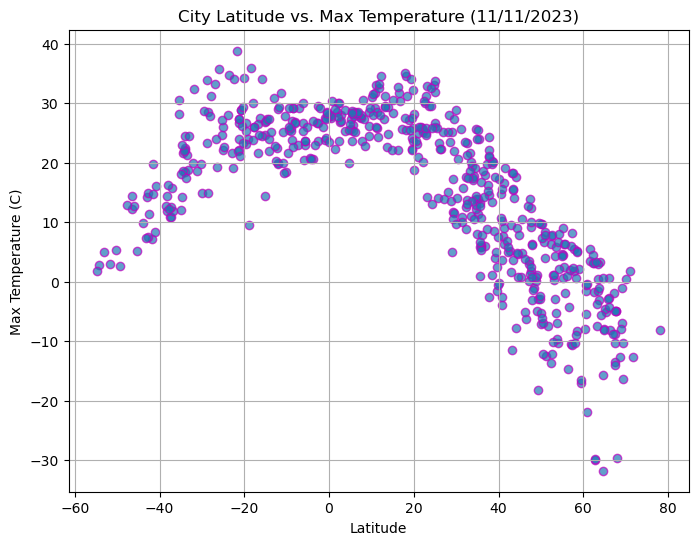

In [145]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.7, edgecolors="m")

plt.title("City Latitude vs. Max Temperature (11/11/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.grid(True)

# Save figure 
output_path = "C:\\Users\\sooki\\OneDrive\\Desktop\\api_challenge\\output_data\\Fig1.png"
plt.savefig(output_path)

# Display plot
plt.show()

#### Latitude vs. Humidity

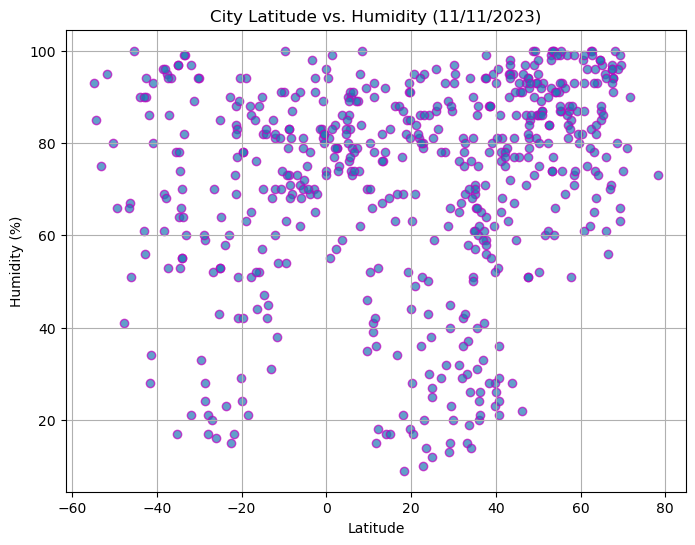

In [146]:
# Build scatter plot for latitude vs. Humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.7, edgecolors="m")

plt.title("City Latitude vs. Humidity (11/11/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)

# Save figure 
output_path = "C:\\Users\\sooki\\OneDrive\\Desktop\\api_challenge\\output_data\\Fig2.png"
plt.savefig(output_path)

# Display plot
plt.show()

#### Latitude vs. Cloudiness



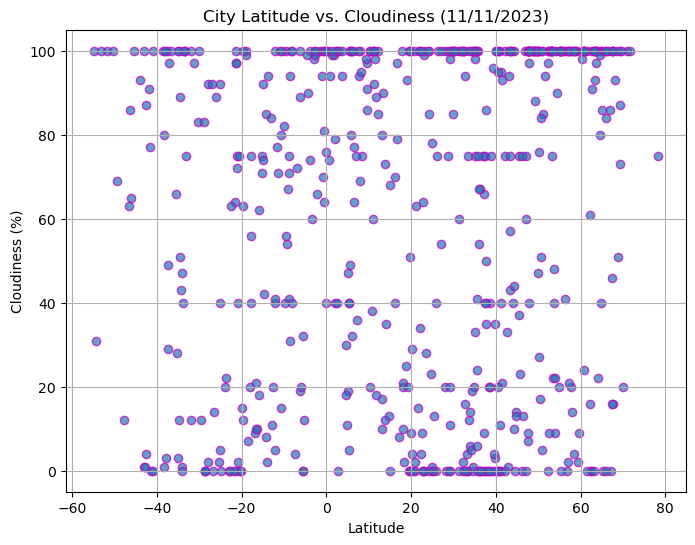

In [147]:
# Build scatter plot for latitude vs. Cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.7, edgecolors="m")

plt.title("City Latitude vs. Cloudiness (11/11/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)

# Save figure 
output_path = "C:\\Users\\sooki\\OneDrive\\Desktop\\api_challenge\\output_data\\Fig3.png"
plt.savefig(output_path)

# Display plot
plt.show()

#### Latitude vs. Wind Speed

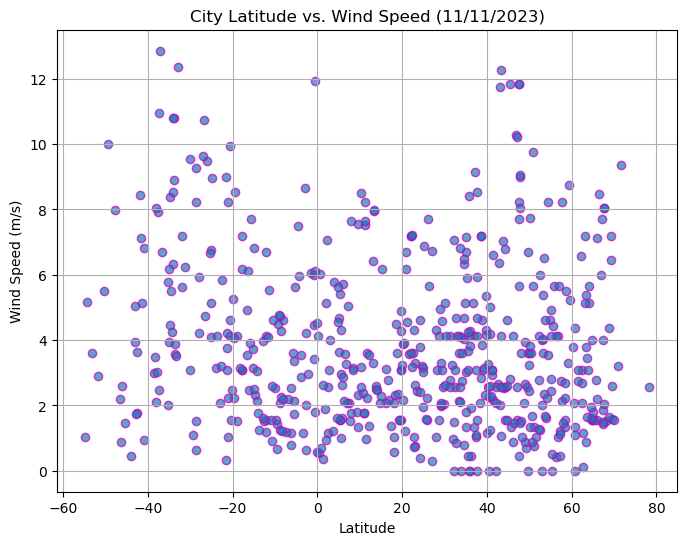

In [148]:
# Build scatter plot for latitude vs. Wind Speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.7, edgecolors="m")

plt.title("City Latitude vs. Wind Speed (11/11/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid(True)

# Save figure 
output_path = "C:\\Users\\sooki\\OneDrive\\Desktop\\api_challenge\\output_data\\Fig4.png"
plt.savefig(output_path)

# Display plot
plt.show()

### Requirement 2. Compute Linear Regression for Each Relationship
- Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude). 
- You may find it helpful to define a function in order to create the linear regression plots.
- Next, create a series of scatter plots. 
- Be sure to include the linear regression line, the model's formula, and the r values as you can see in the following image

In [149]:
def linear_regress(x, y, coordinates):
    r = np.corrcoef(x, y)[0, 1]  # Calculate Pearson correlation coefficient using numpy
    print(f"The Pearson correlation coefficient (r) is: {r}")
    
    slope, intercept, r_value, p_value, stderr = linregress(x, y)
    regress_values = x * slope + intercept

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [150]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-1.91,93,100,5.66,CA,1699692075
1,albany,42.6001,-73.9662,5.23,79,33,2.66,US,1699691857
2,happy valley-goose bay,53.3168,-60.3315,-2.83,74,75,3.60,CA,1699692219
3,mazara del vallo,37.6641,12.5880,20.97,59,50,5.94,IT,1699692220
5,ribeira grande,38.5167,-28.7000,20.22,88,20,7.20,PT,1699692156


In [151]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,2.70,66,69,10.01,TF,1699691952
8,margaret river,-33.9500,115.0667,18.41,55,1,8.89,AU,1699692022
11,adamstown,-25.0660,-130.1015,22.10,85,92,4.08,PN,1699692062
12,quelimane,-17.8786,36.8883,29.97,51,40,3.09,MZ,1699692227
14,west island,-12.1568,96.8225,28.99,70,40,6.69,CC,1699692098


####  Temperature vs. Latitude Linear Regression

The Pearson correlation coefficient (r) is: -0.8650956439491817


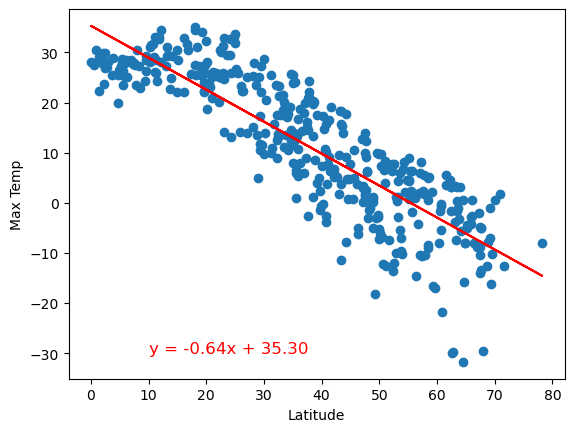

In [152]:
# Linear regression on NORTHERN Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The Pearson correlation coefficient (r) is: 0.650227209480497


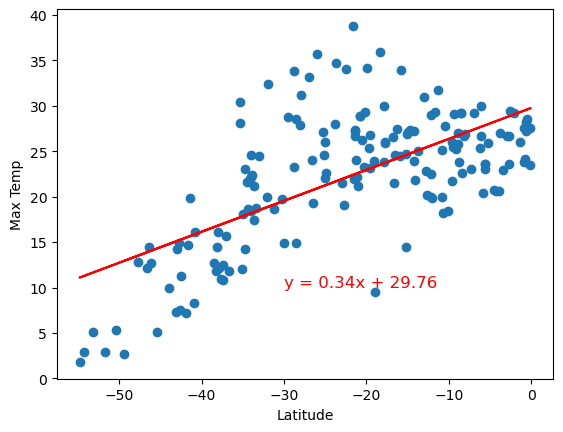

In [153]:
# Linear regression on SOUTHERN Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 10))

### Discussion about the Temperature vs. Latitude linear relationship
**Northern Hemisphere:**
- The correlation coefficient between latitude and max temp is approximately -0.87, this suggests a strong negative correlation as a correlation coefficient close to -1 or 1 suggests a strong relationship.
- This indicates a high level of certainty that as latitude increases, maximum temperature decreases.
- In other words, the further cities are from the equator (higher latitudes), temperatures decrease.

**Southern Hemisphere:**
- As r = 0.65 between latitude and max temp, this suggests that for temperatures to increase as one gets closer to the equator, but the correlation is not as decisive as in the Northern Hemisphere.
- In other words, the closer cities are from the equator (lower latitudes), temperatures increase.

#### Humidity vs. Latitude Linear Regression

The Pearson correlation coefficient (r) is: 0.2660130450759442


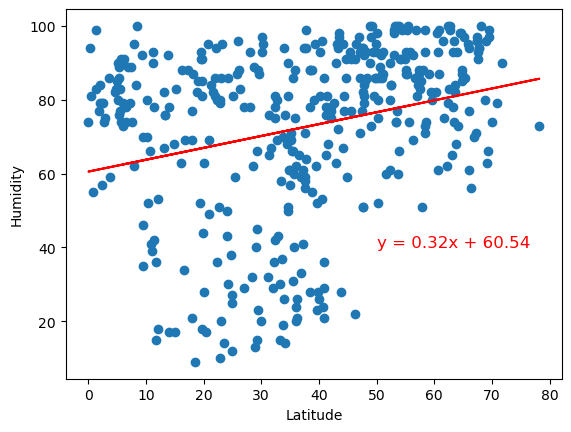

In [154]:
# NORTHERN Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The Pearson correlation coefficient (r) is: 0.06042280225443054


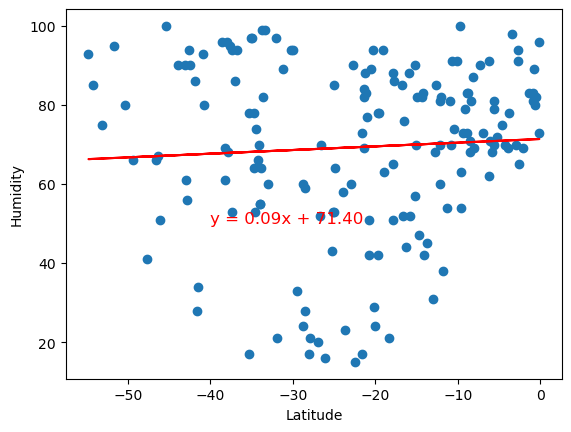

In [155]:
# SOUTHERN Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-40, 50))

### Discussion about the Humidity vs. Latitude linear relationship
**Northern Hemisphere:**
- r = 0.27 suggests a weak positive correlation between latitude and humidity. 
- The equation suggests a slight increase in humidity with higher latitudes, but the correlation is not strong, indicating that there may be other factors influencing humidity levels apart from latitude.

**Southern Hemisphere:**
- As r = 0.06 suggests a weaker postive correlation between latitude and humidity. 
- This equation suggests that latitude has very low level of predictive power for humidity in the Southern Hemisphere.
- There may be other factors influencing humidity levels apart from latitude.

#### Cloudiness vs. Latitude Linear Regression

The Pearson correlation coefficient (r) is: 0.09286463586787029


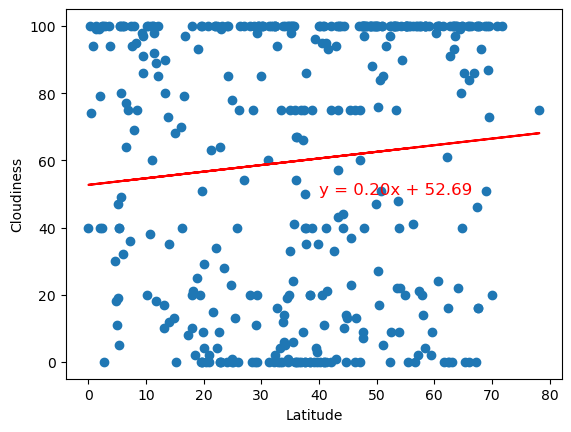

In [156]:
# NORTHERN Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (40, 50))

The Pearson correlation coefficient (r) is: 0.0542460735836437


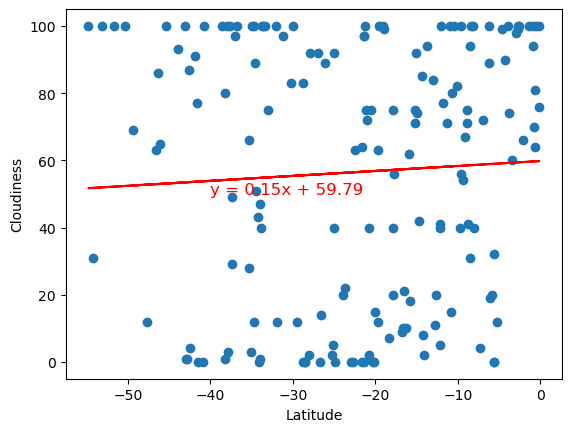

In [159]:
# SOUTHERN Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-40, 50))

### Discussion about the Cloudiness vs. Latitude linear relationship
**Northern Hemisphere:** 
- r = 0.09 suggests a very weak positive correlation between latitude and cloudiness in the Northern Hemisphere. 
- The positive linear regression equation shows a minimal increase in cloudiness with higher latitudes.
- There may be other factors influencing cloudiness level apart from latitude.

**Southern Hemisphere:**
- Similarly, r = 0.05 indicates that there is a very weak positive correlation (r = 0.05) between latitude and cloudiness.
- Latitude is not a strong predictor of cloudiness level in the Southern Hemisphere.

#### Wind Speed vs. Latitude Linear Regression

The Pearson correlation coefficient (r) is: 0.041653325728132615


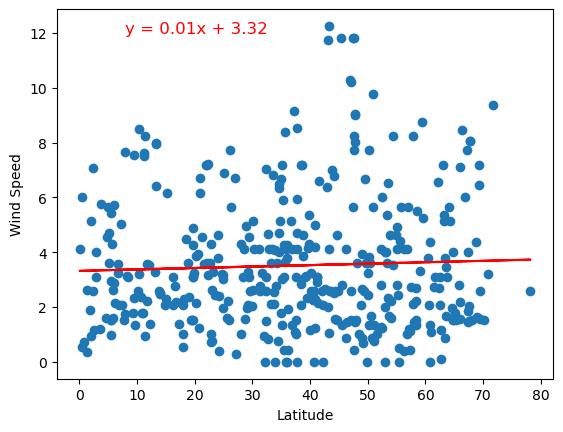

In [165]:
# NORTHERN Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (8,12))

The Pearson correlation coefficient (r) is: -0.22150055026576526


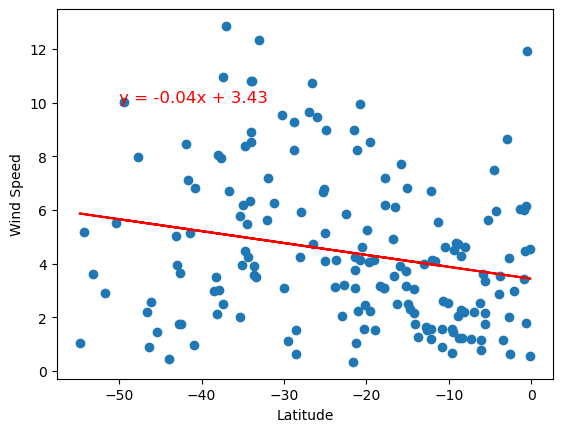

In [166]:
# SOUTHERN Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 10))

### Discussion about the Wind Speed vs. Latitude linear relationship
**Northern Hemisphere:** 
- r = 0.04 suggests a very weak positive correlation between latitude and wind speed in the Northern Hemisphere. 
- The positive linear regression equation suggests a minimal increase in cloudiness with higher latitudes.
- There may be other factors influencing wind speed apart from latitude.

**Southern Hemisphere:**
- r = -0.22 indicates that there is a very weak negative correlation between latitude and wind speed.
- The negative linear regression equation shows that latitude is not a strong predictor of wind speed in the Southern Hemisphere.